<a href="https://colab.research.google.com/github/KonstantinElfimow/test-skytecgames/blob/main/test_skytecgames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание**

https://drive.google.com/file/d/177ARF_woT0OBkUfDu24hpgc4fOAqKkr7/view?usp=sharing

# Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.stats.api as sms
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Решение задач

## Задача #1 (Успешность прототипа)

Условие:
*   Известно что компания конкурент выпустила 1000 прототипов игр, из которых было 5 успешных. Наша компания выпустила 200 прототипов из которых ни один не был успешен.
*   Какова вероятность что следующий (201й) наш прототип будет успешен? Какими методами можно решать данную задачу? Предложите как минимум 2 варианта. Если у вас есть какой-то вариант решения задачи для которого требуются доп. данные - перечислите что требуется и метод решения.

### **Мои решения**

1.   Одним из решений будет являться предположение о том, что наша компания не пользуется успехом на рынке, так как посчитав относительную частоту успеха мы получим 0 (m / n, где m - количество успешных прототипов нашей компании, n - общее количество наших прототипов). Тогда воспользовавшись формулой Бернулли, мы тоже получим 0.
> Ответ (в процентах): 0%

2.   Вторым решением будет предположение о том, что наша компания такая же успешная, как и компания-конкурент, просто нам пока ещё не выпал случай получить успешный кейс, так как этот случай - ***редкое*** событие. Тогда мы можем посчитать вероятность, что 201-й прототип будет успешным, воспользовавшись теоремой Пуассона и приближенной формулой Пуассона.


In [2]:
p = 5 / 1000 # относительная частота успеха

n1 = 201 # Всего испытаний
k1 = 1 # 201-й прототип окажется успешным
lambda_1 = n1 * p # среднее число успехов за один прототип

# приближенная формула Пуассона. Вероятность успешного выпуска ровно 1 прототипа из 201
result = ((lambda_1 ** k1) / np.math.factorial(k1)) * np.exp(-lambda_1)
print(round(result, 4))

0.3679



> Ответ (в процентах): ~36,8%

## Задача #2 (Сравнение групп платящих игроков)

Условие:
*   В мобильной игре около 10% игроков совершает платежи в первый месяц с момента установки игры (база расчета - 500 игроков).
*   Геймдизайнеры разработали обновление которое по их экспертной оценке должно увеличить процент плательщиков с 10% до 11%. Цель эксперимента - подтвердить или опровергнуть их гипотезу.

Задачи:
1. Опишите оптимальный по вашему мнению дизайн эксперимента
2. Рассчитайте длительность эксперимента при условии что каждый день в игру приходит около 100 новых игроков.
3. Самостоятельно сгенерируйте датасет с около 10% плательщиков (контроль) и рассчитайте доверительный интервал.
4. Сгенерируйте несколько вариантов экспериментальной группы (хуже, лучше, без эффекта), рассчитайте силу эффекта, ДИ и ваши выводы для каждого варианта.
5. Решите задачу 2 разными подходами: frequentist / bayesian
Необходимо все ответы сопроводить

**Решение**

**Сноска**
> Если я правильно понял задание, то цель нашего эксперимента увеличить конверсию в покупку внутри игрового магазина для НОВЫХ пользователей в течение месяца с момента установки приложения.



### **Пункт 1**


*   Пользователи будут разбиваться на 2 группы случайным образом: контрольную и экспериментальную. Контрольная группа будет играть в стандартную версию игры без обновления, а экспериментальная группа будет играть в версию с обновлением.
*   Так как ожидается большой эффект на поведение игроков, то следует использовать более равномерное соотношение, например, 50/50 или 70/30. Я буду использовать 50/50.
*   Я бы предложил проводить эксперимент в течение 2-х месяцев (это лишь моя мысль в тот момент, когда я ещё не посчитал необходимое количество новых пользователей для проверки гипотезы), в течение первого месяца будут приходить новые пользователи, на которых будет проводиться эксперимент, и до конца второго месяца собирали бы информацию о том, была ли конверсия в покупку у этих пользователей из 2-х групп.
*   Я могу предположить, что геймдизайнеры ввели акцию в игровом магазине, полагаясь на эффект новизны у новых пользователей, где они бы видели для себя выгоду. Такой эксперимент не слишком трудозатратный, в отличие от маркетинговых кампаний, которые могут нам выйти очень дорого, что даже 1% изменений в лучшую сторону не покроет расходов на рекламу.
*   В конце эксперимента можно провести множественную проверку гипотез, чтобы выяснить, какие элементы обновления оказали наибольшее влияние на поведение игроков (какие акции были более успешными). Это поможет геймдизайнерам улучшить игру еще больше в будущем.
*   Я бы хотел предложить ещё B/A-тест в случае успеха с A/B-тестом, однако в силу специфической метрики (конверсия в покупку внутри игрового магазина для новых пользователей в течение месяца с момента установки приложения), то я не вижу такой возможности раскатать обратный тест для пользователей. Аналогично с A/A-тестом. Мы просто не можем уже группу пользователей, видивших акцию,откатить к старой версии (мы что насильно у них её отберём до окончания таймера?), это как-то нелогично.






### **Пункт 2**

In [3]:
alpha = 0.05
beta = 0.2

p0 = 0.1
pa = 0.11

# сила эффекта
es = sms.proportion_effectsize(pa, p0)
print(f'Сила эффекта: {es}')
# Минимальный размер выборки, чтобы задетектить минимальную силу эффекта и получить ошибки alpha и beta
n = zt_ind_solve_power(
    effect_size=es,
    nobs1=None,
    alpha=alpha,
    power=(1 - beta),
    ratio=1,
    alternative='larger'
    )
n = int(np.ceil(n / 2))
print(f'Размер каждой из групп: {n}')

Сила эффекта: 0.03262940076737697
Размер каждой из групп: 5807


In [4]:
# n - количество наблюдений в каждой группе,
# а так как отношение групп будет 1:1,
# тогда всего наблюдений за время A/B-теста нужно 2n

# Если в день приходит по 100 новых пользователей, то эксперимент будет длиться
days = int(np.ceil(2 * n / 100))
print(days)

117


In [5]:
# 117 дней мы должны собирать данные о новых пользователях, НО!
# так как в условии задания сказано, что новый пользователь должен ещё в течение
# месяца совершить покупку, то для самого последнего пользователя мы ещё должны
# пронаблюдать его поведение в течение следующего месяца,
# поэтому итоговый ответ будет
days += 30
print(days)

147




> Ответ: 147 дней





### **Пункт 3**

In [12]:
def conf_interval(p, n, alpha):
  H = stats.norm.ppf(1 - alpha / 2) * ((p * (1 - p) / n) ** .5)
  return (p - H), (p + H)

In [13]:
# датасет с около 10% плательщиков (контроль)
control_dataset = pd.Series(np.random.binomial(1, 0.1, size=n))
# конверсия в покупку после 1 месяца со дня установки игры
p = control_dataset.mean()
print('Конверсия: {:.05f}\n'.format(p))
lower, upper = conf_interval(p, n, alpha)
print('Доверительный интервал для плательщиков:\n({:.05f}; {:.05f})\n'.format(lower, upper))
print('Уровень значимости:\nalpha={}'.format(alpha))

Конверсия: 0.09712

Доверительный интервал для плательщиков:
(0.08951; 0.10474)

Уровень значимости:
alpha=0.05


### **Пункт 4**

**Сноска** (а-ля пастулат)
> Контрольная и экспериментальная группы - это 2 независимые выборки. Пользователи в них были выбраны абсолютно случайным образом.



In [14]:
# Контрольная группа
df = pd.DataFrame(control_dataset)
df.rename(columns={df.columns[0]: 'converted'}, inplace=True)
df['con_treat'] = 'control'
display(df.head(5))

,converted,con_treat
0,0,control
1,0,control
2,0,control
3,0,control
4,0,control


**Хуже**

In [15]:
copy = df.copy()

# генерируем группу, на которых проверяется обновление. Конверсия хуже на 3%
treat_dataset = pd.Series(np.random.binomial(1, 0.07, size=n))
treat_dataset = pd.DataFrame(treat_dataset)
treat_dataset.rename(columns={treat_dataset.columns[0]: 'converted'}, inplace=True)
treat_dataset['con_treat'] = 'treatment'

copy = pd.concat([copy, treat_dataset])
table = pd.pivot_table(copy, index='con_treat', values='converted', aggfunc='sum')
# размер группы
table['size'] = copy.groupby('con_treat').size()
# конверсия
table['cr'] = table['converted'] / table['size']
# Результат по сбору данных
display(table)

,converted,size,cr
con_treat,,,
control,564,5807,0.097124
treatment,398,5807,0.068538


In [16]:
# сила эффекта
es = sms.proportion_effectsize(table.loc['treatment', 'cr'],
                               table.loc['control', 'cr'])
print('Сила эффекта: {:.04f}\n'.format(es))

# доверительный интервал для экспериментальной группы
lower, upper = conf_interval(table.loc['treatment', 'cr'],
                             table.loc['treatment', 'size'],
                             alpha)
print('Доверительный интервал для плательщиков (treatment):\n({:.05f}; {:.05f})'.format(lower, upper))
print('Уровень значимости:\nalpha={}\n'.format(alpha))

# Минимальный размер выборки, чтобы задетектить минимальную силу эффекта
new_n = zt_ind_solve_power(effect_size=es,
                           nobs1=None,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=1,
                           alternative='smaller'
                           )
new_n = int(np.ceil(new_n / 2))
print(f'Минимальный размер каждой из групп может быть таким: {new_n}\n')

# p-value, рассчитанное для всей выборки
pval = proportions_ztest(table['converted'].values,
                         table['size'].values,
                         alternative='larger')[1]
print(f'p-value: {pval}')

# После сбора данных обнаруживается, что размер группы может быть сильно меньше,
# так как эффект получился более выраженным. Здесь я хочу применить bootstrap.
# Если распределение p-value будет неравномерным, то выборки различны. Если нет,
# то выборки взяты из одного распределения.
count = 10000
result = []
group_1 = copy[copy['con_treat'] == 'control']['converted']
group_2 = copy[copy['con_treat'] == 'treatment']['converted']
for _ in tqdm(range(count)):
  a = group_1.sample(n=int(new_n), replace=True)
  b = group_2.sample(n=int(new_n), replace=True)
  pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)], alternative='larger')[1]
  result.append(pval)
result = pd.Series(result)

Сила эффекта: -0.1041

Доверительный интервал для плательщиков (treatment):
(0.06204; 0.07504)
Уровень значимости:
alpha=0.05

Минимальный размер каждой из групп может быть таким: 571

p-value: 1.1451435468568451e-08


  0%|          | 0/10000 [00:00<?, ?it/s]

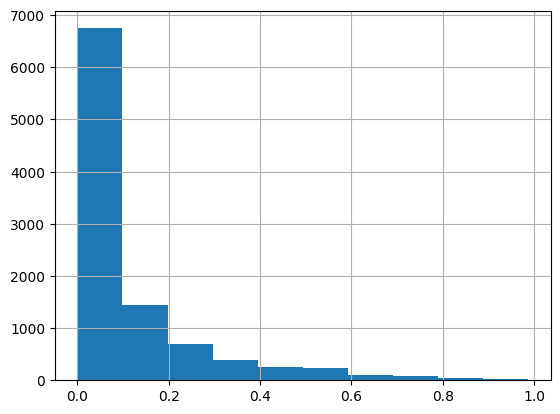

In [17]:
# построение гистограммы для p-value
result.hist();

**Вывод:**
> Посчитанное p-value для всей выборки и распределение p-value методом bootstrap говорит, что есть основания отвергнуть нулевую гипотезу о равенстве конверсии двух выборок. Принимаем альтернативную гипотезу о том, что новое обновление сильно хуже старого, поэтому не вводим его в эксплуатацию для всех пользователей.


**Лучше**

In [18]:
copy = df.copy()

# генерируем группу, на которых проверяется обновление. Конверсия лучше на 1%
treat_dataset = pd.Series(np.random.binomial(1, 0.11, size=n))
treat_dataset = pd.DataFrame(treat_dataset)
treat_dataset.rename(columns={treat_dataset.columns[0]: 'converted'}, inplace=True)
treat_dataset['con_treat'] = 'treatment'

copy = pd.concat([copy, treat_dataset])
table = pd.pivot_table(copy, index='con_treat', values='converted', aggfunc='sum')
# размер группы
table['size'] = copy.groupby('con_treat').size()
# конверсия
table['cr'] = table['converted'] / table['size']
# Результат по сбору данных
display(table)

,converted,size,cr
con_treat,,,
control,564,5807,0.097124
treatment,627,5807,0.107973


In [19]:
# сила эффекта
es = sms.proportion_effectsize(0.11, 0.10)
print('Сила эффекта: {:.04f}\n'.format(es))

# доверительный интервал для экспериментальной группы
lower, upper = conf_interval(table.loc['treatment', 'cr'],
                             table.loc['treatment', 'size'],
                             alpha)
print('Доверительный интервал для плательщиков (treatment):\n({:.05f}; {:.05f})'.format(lower, upper))
print('Уровень значимости:\nalpha={}\n'.format(alpha))

# Минимальный размер выборки, чтобы задетектить минимальную силу эффекта
new_n = zt_ind_solve_power(effect_size=es,
                           nobs1=None,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=1,
                           alternative='larger'
                           )
new_n = int(np.ceil(new_n / 2))
print(f'Минимальный размер каждой из групп может быть таким: {new_n}\n')

# p-value, рассчитанное для всей выборки
pval = proportions_ztest(table['converted'].values,
                         table['size'].values,
                         alternative='smaller')[1]
print(f'p-value: {pval}')

Сила эффекта: 0.0326

Доверительный интервал для плательщиков (treatment):
(0.09999; 0.11596)
Уровень значимости:
alpha=0.05

Минимальный размер каждой из групп может быть таким: 5807

p-value: 0.02699050728024154


**Вывод:**
> Посчитанное p-value говорит, что есть основания отвергнуть нулевую гипотезу о равенстве конверсии двух выборок. Принимаем альтернативную гипотезу о том, что новое обновление лучше старого, однако не так сильно для нашей базы игроков, как хотелось бы, но тест показал, что мы можем вводить обновление в эксплуатацию.

**Без эффекта**

In [20]:
copy = df.copy()

# генерируем группу, на которых проверяется обновление. Конверсия та же
treat_dataset = pd.Series(np.random.binomial(1, copy['converted'].mean(), size=n))
treat_dataset = pd.DataFrame(treat_dataset)
treat_dataset.rename(columns={treat_dataset.columns[0]: 'converted'}, inplace=True)
treat_dataset['con_treat'] = 'treatment'

copy = pd.concat([copy, treat_dataset])
table = pd.pivot_table(copy, index='con_treat', values='converted', aggfunc='sum')
# размер группы
table['size'] = copy.groupby('con_treat').size()
# конверсия
table['cr'] = table['converted'] / table['size']
# Результат по сбору данных
display(table)

,converted,size,cr
con_treat,,,
control,564,5807,0.097124
treatment,599,5807,0.103151


In [21]:
# сила эффекта
es = sms.proportion_effectsize(table.loc['treatment', 'cr'],
                               table.loc['control', 'cr'])
print('Сила эффекта: {:.04f}\n'.format(es))

# доверительный интервал для экспериментальной группы
lower, upper = conf_interval(table.loc['treatment', 'cr'],
                             table.loc['treatment', 'size'],
                             alpha)
print('Доверительный интервал для плательщиков (treatment):\n({:.05f}; {:.05f})'.format(lower, upper))
print('Уровень значимости:\nalpha={}\n'.format(alpha))

# Минимальный размер выборки, чтобы задетектить минимальную силу эффекта
new_n = zt_ind_solve_power(effect_size=es,
                           nobs1=None,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=1,
                           alternative='two-sided'
                           )
new_n = int(np.ceil(new_n / 2))
print(f'Минимальный размер каждой из групп может быть таким: {new_n}\n')

# p-value, рассчитанное для всей выборки
pval = proportions_ztest(table['converted'].values,
                         table['size'].values,
                         alternative='two-sided')[1]
print(f'p-value: {pval}')

Сила эффекта: 0.0201

Доверительный интервал для плательщиков (treatment):
(0.09533; 0.11097)
Уровень значимости:
alpha=0.05

Минимальный размер каждой из групп может быть таким: 19466

p-value: 0.27929358484253763


**Вывод:**
> Посчитанное p-value говорит, что нет оснований (недостаточно данных), чтобы отвергнуть нулевую гипотезу о равенстве конверсии двух выборок. Выборки пришли из одного распределения. Получается, что обновление никак не повлияет на конверсию в покупку для новых пользователей.

### **Пункт 5**

В пункте 4 я решал задачу методом Bayesian A/B-testing

**Bayesian A/B-testing**


*   Размер выборки для проведения A/B-теста должен быть определён заранее.
*   Нельзя досрочно прерывать A/B-тест, при достижении значимости на более маленькой выборке.
*   Нельзя продолжать A/B-тест, если за изначально запланированный период значимого результата получить не удалось.
*   Нельзя менять метрики/критерии по результатам подглядывания.
*   Следует дождаться конца теста, чтобы ответить на вопрос о значимой разнице, когда вся выборка будет собрана.
*   Можно перезапускать тест на новых данных.


